<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Pandas: Data Visualization
</p>
</div>

Data Science Cohort Live NYC Feb 2022
<p>Phase 1: Topic 4</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    

#### Pandas in-built visualization toolset
- Very handy for quick plotting of data in DataFrames and Series.
- High level interface to matplotlib.
- Support for a variety of plots:
    - Line plots
    -Scatter plots
    - Histograms
    - Bar plots
    - Box plots
    - ...

In [1]:
import matplotlib.pyplot as plt # visualization library
import numpy as np
import pandas as pd

#### Styling a Plot

Most styling options controlled by matplotlib.

- Background color
- Line style
- Color maps
- Overall style themes

Let's take a look at available themes: plt.style.available

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In order to select a style:

In [2]:
plt.style.use('ggplot') # this is the default style that R uses


Create our own dataset quick:

- Generates 365 normally distributed random numbers.
- Setting a seed means that "random" sample will be the same on every execution.
- Create a datetime index that spans an entire year.

In [4]:
np.random.seed(777) # pseudo-random seed. 

data = pd.DataFrame({'A':np.random.randn(365).cumsum(),
                    'B':np.random.randn(365).cumsum() + 25,
                    'C':np.random.randn(365).cumsum() - 25}, 
                     index = pd.date_range('1/1/2018', periods = 365))
data.head()

,A,B,C
2018-01-01,-0.468209,25.435990,-22.997943
2018-01-02,-1.291034,26.479220,-22.673404
2018-01-03,-1.356414,25.832356,-21.669027
2018-01-04,-2.069776,26.456703,-21.408310
2018-01-05,-1.163425,25.864281,-22.685208


Creating a line plot of A, B, and C vs the date:

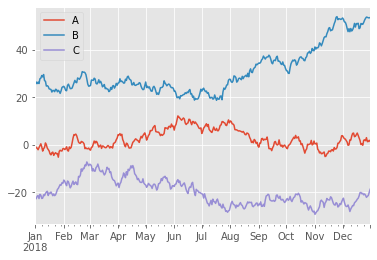

In [5]:
data.plot()
plt.show()

#### Scatter Plots
- Make plot of (x,y) data points
- x comes from one column
- y comes from another column

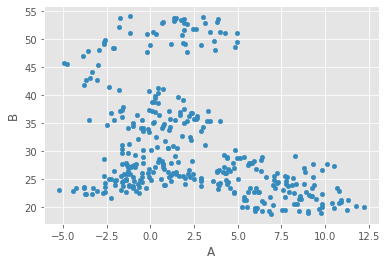

In [5]:
data.plot(x = 'A', y = 'B', kind = 'scatter')
plt.show()

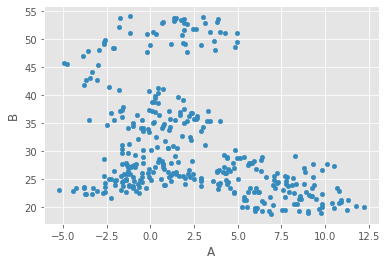

In [7]:
data.plot.scatter(x = 'A', y = 'B')
plt.show()

Sometimes it's useful to have a color map on the data points.

A potential use case is:

Representing surface ocean temperatures sampled at various locations:

- x = x-coordinate
- y = y-coordinate
- color = temperature on surface

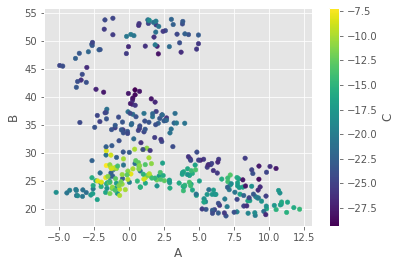

In [6]:
fig, ax = plt.subplots()
data.plot.scatter(x = 'A', y = 'B', c = 'C', colormap = 'viridis', ax = ax)
plt.show()

Also can set size of markers via a series:

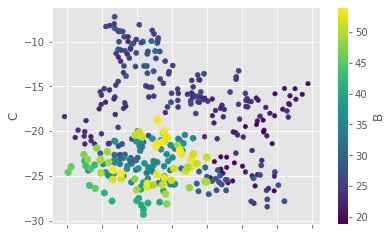

In [7]:
data.plot.scatter('A', 'C', c = 'B', s = data['B'], colormap = 'viridis')
plt.show()

A complete list of colormaps is available in the Official Matplotlib Documentation.

Pandas plots are matplotlib objects. Can use matplotlib commands to modify plots:

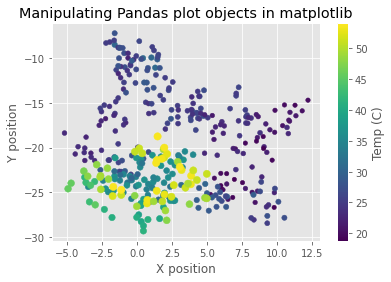

In [8]:
fig, ax = plt.subplots()

data.plot.scatter('A', 'C', c = 'B', s = data['B'], colormap = 'viridis', ax = ax)
ax.set_title('Manipulating Pandas plot objects in matplotlib')
ax.set_xlabel('X position')
ax.set_ylabel('Y position')

f = plt.gcf()

color_ax = f.get_axes()[1]

color_ax.set_ylabel('Temp (C)')

plt.show()

#### Some Other Plots

The histogram:

- bins: sets the number of bins
- alpha: opacity level
- hist_type: sets style
    

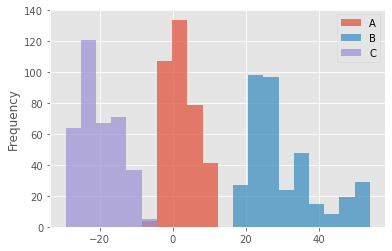

In [11]:
data.plot.hist(bins = 20, alpha = 0.7); 

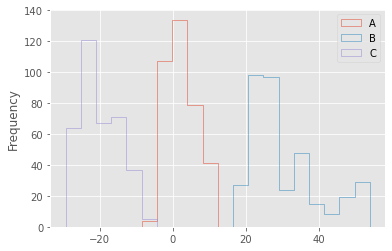

In [12]:
data.plot.hist(bins = 20, histtype='step'); 

Kernel density estimation (KDE) plot:
- Calculates a best guess smoothed distribution and plots

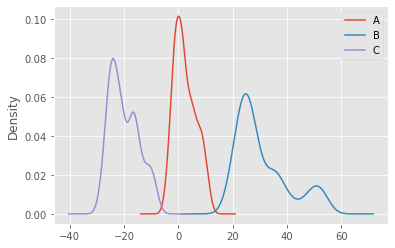

In [13]:
data.plot.kde();

Box plot:
- Pretty useful for visualizing median and 25-75 IQR of numerical data.
- Particular useful for side by side comparison of groups.

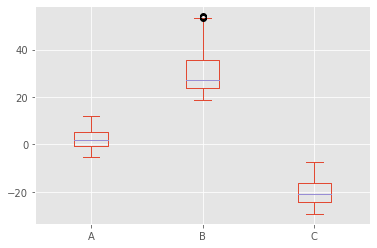

In [14]:
data.plot.box();

#### Scatter Matrix


- Pairwise comparison of columns in a DataFrame.
- Get overall picture of data: see obvious patterns throughout the dataset
- Scatter matrix: 
    - Different columns: scatter plot (off diagonal)
    - Also gets histogram for each individual column (diagonal)

Let's start with an other iconic data set: the iris flower dataset.

In [9]:
iris = pd.read_csv('Data/Iris.csv')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [17]:
iris.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


Do you see any patterns?

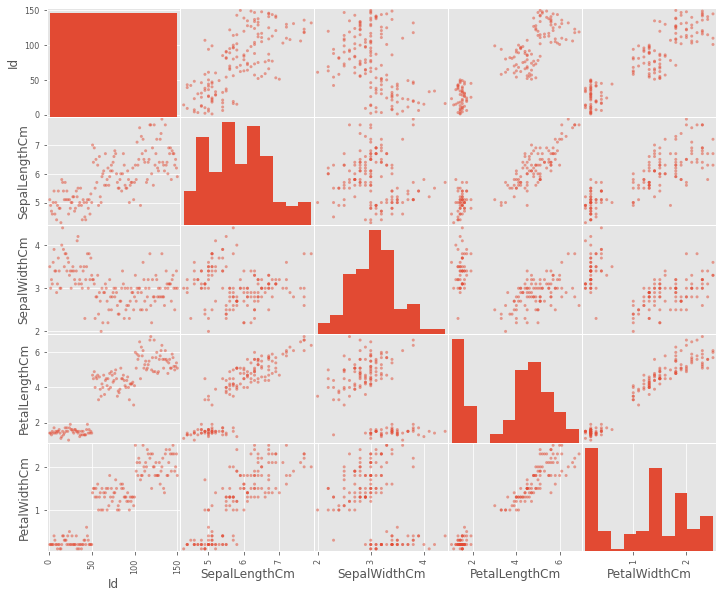

In [10]:
pd.plotting.scatter_matrix(iris, figsize = (12,10));

#### Parallel Plots

- Can be useful for identifying differences between groups by column
- Each individual observation is a line
- color mapping to code group

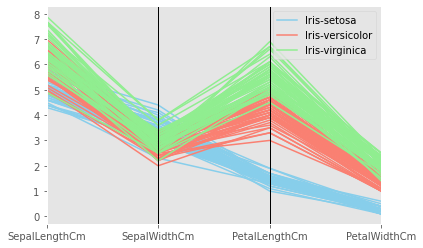

In [19]:
colormap = ('skyblue', 'salmon', 'lightgreen')
pd.plotting.parallel_coordinates(iris.drop(columns = 'Id'), 'Species', color=colormap)
plt.show()

What can we learn from this plot?